## 1. Introduction
This goal of this project is to gain insights from the crime data of Chicago area in 2019. 

I have been staying in Chicago area for 4 years. Safety concern has always been an issue in this area. 

By looking at the crime data, I would like to gain insights on the safe and dangerous areas in chicago and how chicago distribute their resources to maintain the safety.

## 2. Import data

* Install packages

In [2]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 1s (384 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.

In [3]:
!pip install  -U git+https://github.com/matplotlib/basemap.git

  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-bqlrpkxu
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-bqlrpkxu
     |████████████████████████████████| 10.1MB 3.4MB/s 
     |████████████████████████████████| 225kB 60.4MB/s 
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756036 sha256=b6b0a82f8a3a0b5a701e00d9b6b3f9c882a35493081026fe267581f5cb0edcd1
  Stored in directory: /tmp/pip-ephem-wheel-cache-gqxf0fn0/wheels/3f/f3/56/de548b66967d0d661612b7618022e2c0d4b86b9a638cf6ccf3
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32607 sha256=fc3308e2fd393e3c8d582752a1512aca885e38435eb87cbf048fbdcfd17ced47
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built basemap pyshp


In [4]:
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-3mztea3o
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-3mztea3o
  Created wheel for folium: filename=folium-0.10.1+6.g4a7532d-py2.py3-none-any.whl size=93921 sha256=982030a37f2a911fbd93e6e63a2de2fd4cdd34a348ee6d1803d081c77d920af5
  Stored in directory: /tmp/pip-ephem-wheel-cache-_revvhcl/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.10.1+6.g4a7532d which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [310]:
pip install tika

* Import packages

In [0]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Greens')
%matplotlib inline 
import cv2
import matplotlib.image as mpimg
from datetime import datetime
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess
from mpl_toolkits.basemap import Basemap
import folium
from sklearn.cluster import KMeans
from google.colab import files

* Load csv data

In [14]:
uploaded = files.upload()

Saving Crimes_2019_chi.csv to Crimes_2019_chi.csv
Saving Police_Stations.csv to Police_Stations.csv
Saving Ward_Offices.csv to Ward_Offices.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['Crimes_2019_chi.csv']))

In [0]:
df_ps = pd.read_csv(io.BytesIO(uploaded['Police_Stations.csv']))

In [0]:
df_wo = pd.read_csv(io.BytesIO(uploaded['Ward_Offices.csv']))

* Load pdf and image data 

In [43]:
uploaded_pdf = files.upload()

Saving Community_Areas_W_Numbers.pdf to Community_Areas_W_Numbers.pdf


In [313]:
uploaded_png = files.upload()

Saving chi_community.png to chi_community (1).png


* What the PDF looks like

I convert the PDF file to image to give a sense how the file looks. Next, we would like to extract the community name from the bottom left corner to a pandas dataframe.

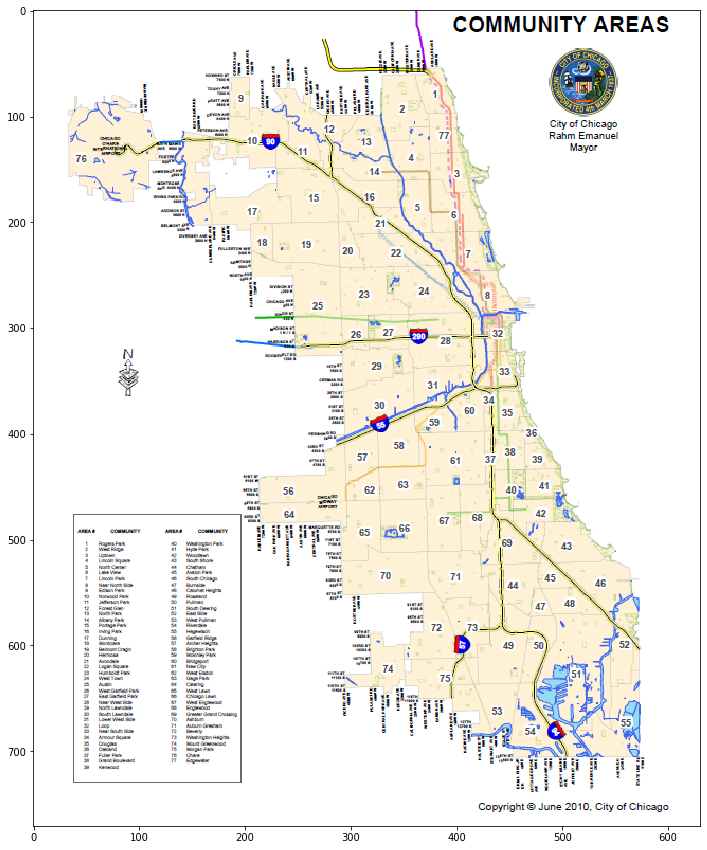

In [314]:
fig,ax = plt.subplots(1,1,figsize = (15,15))
img = mpimg.imread('chi_community.png')
ax.imshow(img) 
plt.show() 

* Extract data from pdf

In [98]:
# extract data from pdf
from tika import parser
raw = parser.from_file("Community_Areas_W_Numbers.pdf")
raw = str(raw)

safe_text = raw.encode('utf-8', errors='ignore')
safe_text = str(safe_text).replace("\n", "").replace("\\n", " ")
print('--- safe text ---' )
print( safe_text )

--- safe text ---
b'{\'metadata\': {\'Content-Type\': \'application/pdf\', \'Creation-Date\': \'2011-08-10T15:22:00Z\', \'X-Parsed-By\': [\'org.apache.tika.parser.DefaultParser\', \'org.apache.tika.parser.pdf.PDFParser\'], \'X-TIKA:content_handler\': \'ToTextContentHandler\', \'X-TIKA:embedded_depth\': \'0\', \'X-TIKA:parse_time_millis\': \'195\', \'access_permission:assemble_document\': \'true\', \'access_permission:can_modify\': \'true\', \'access_permission:can_print\': \'true\', \'access_permission:can_print_degraded\': \'true\', \'access_permission:extract_content\': \'true\', \'access_permission:extract_for_accessibility\': \'true\', \'access_permission:fill_in_form\': \'true\', \'access_permission:modify_annotations\': \'true\', \'dc:format\': \'application/pdf; version=1.6\', \'dcterms:created\': \'2011-08-10T15:22:00Z\', \'meta:creation-date\': \'2011-08-10T15:22:00Z\', \'pdf:PDFVersion\': \'1.6\', \'pdf:charsPerPage\': \'2958\', \'pdf:docinfo:created\': \'2011-08-10T15:22:00Z

In [0]:
# rearrange data to extract community number-name dataframe
community_code = safe_text.split('COMMUNITY AREA')[-1].strip("'# COMMUNITY\ \'").strip(": 200}").split()[:-12]
cc_list = []
for _ in community_code:
  if '\\' in _:
    cc_list.append(_.strip('\\'))
  else:
    cc_list.append(_)
code_list= []
name_list = []
for _ in cc_list:
  if _.isdigit():
    code_list.append(int(_))
count = 1
while count<len(cc_list):
  temp = []
  while count<len(cc_list) and not cc_list[count].isdigit():
    temp.append(cc_list[count])
    count+=1
  name_list.append(' '.join(temp))
  count+=1

In [141]:
print(cc_list)
print(len(code_list),code_list)
print(len(name_list),name_list)

['1', 'Rogers', 'Park', '40', 'Washington', 'Park', '2', 'West', 'Ridge', '41', 'Hyde', 'Park', '3', 'Uptown', '42', 'Woodlawn', '4', 'Lincoln', 'Square', '43', 'South', 'Shore', '5', 'North', 'Center', '44', 'Chatham', '6', 'Lake', 'View', '45', 'Avalon', 'Park', '7', 'Lincoln', 'Park', '46', 'South', 'Chicago', '8', 'Near', 'North', 'Side', '47', 'Burnside', '9', 'Edison', 'Park', '48', 'Calumet', 'Heights', '10', 'Norwood', 'Park', '49', 'Roseland', '11', 'Jefferson', 'Park', '50', 'Pullman', '12', 'Forest', 'Glen', '51', 'South', 'Deering', '13', 'North', 'Park', '52', 'East', 'Side', '14', 'Albany', 'Park', '53', 'West', 'Pullman', '15', 'Portage', 'Park', '54', 'Riverdale', '16', 'Irving', 'Park', '55', 'Hegewisch', '17', 'Dunning', '56', 'Garfield', 'Ridge', '18', 'Montclare', '57', 'Archer', 'Heights', '19', 'Belmont', 'Cragin', '58', 'Brighton', 'Park', '20', 'Hermosa', '59', 'Mckinley', 'Park', '21', 'Avondale', '60', 'Bridgeport', '22', 'Logan', 'Square', '61', 'New', 'City'

In [156]:
df_ca_code = pd.DataFrame(code_list,name_list).reset_index()
df_ca_code.columns = ['Name','CommunityArea']
df_ca_code.head()

Name  CommunityArea
0      Rogers Park              1
1  Washington Park             40
2       West Ridge              2
3        Hyde Park             41
4           Uptown              3

 We successfully extract the community code and name from the PDF file which looks as the image below.

## 3. Data exploration

### 3.1 Understand the data

In [19]:
df.head()

ID Case Number  ...  Longitude                       Location
0  11937375    JC566342  ... -87.752683  (41.977881445, -87.752683352)
1  11937712    JC566735  ... -87.676847  (41.950532948, -87.676846669)
2  11937620    JC566695  ... -87.644292  (41.936799488, -87.644291704)
3  11937192    JC566077  ... -87.707707  (41.900993603, -87.707706744)
4  11937298    JC566169  ... -87.616187  (41.706597214, -87.616186967)

[5 rows x 22 columns]

In [20]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [0]:
# remove white space in the column name
df = df.rename(columns=lambda x: ''.join(x.split()))

In [22]:
df.columns

Index(['ID', 'CaseNumber', 'Date', 'Block', 'IUCR', 'PrimaryType',
       'Description', 'LocationDescription', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'CommunityArea', 'FBICode', 'XCoordinate',
       'YCoordinate', 'Year', 'UpdatedOn', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [23]:
# check datatype for all columns
# Pandas uses the object dtype for storing strings
df.dtypes

ID                       int64
CaseNumber              object
Date                    object
Block                   object
IUCR                    object
PrimaryType             object
Description             object
LocationDescription     object
Arrest                    bool
Domestic                  bool
Beat                     int64
District                 int64
Ward                   float64
CommunityArea          float64
FBICode                 object
XCoordinate            float64
YCoordinate            float64
Year                     int64
UpdatedOn               object
Latitude               float64
Longitude              float64
Location                object
dtype: object

In [24]:
df.shape

(257002, 22)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257002 entries, 0 to 257001
Data columns (total 22 columns):
ID                     257002 non-null int64
CaseNumber             257002 non-null object
Date                   257002 non-null object
Block                  257002 non-null object
IUCR                   257002 non-null object
PrimaryType            257002 non-null object
Description            257002 non-null object
LocationDescription    256038 non-null object
Arrest                 257002 non-null bool
Domestic               257002 non-null bool
Beat                   257002 non-null int64
District               257002 non-null int64
Ward                   256987 non-null float64
CommunityArea          256998 non-null float64
FBICode                257002 non-null object
XCoordinate            255447 non-null float64
YCoordinate            255447 non-null float64
Year                   257002 non-null int64
UpdatedOn              257002 non-null object
Latitude           

In [26]:
df.describe()

ID           Beat  ...       Latitude      Longitude
count  2.570020e+05  257002.000000  ...  255447.000000  255447.000000
mean   1.172600e+07    1136.884195  ...      41.843501     -87.669450
std    5.258066e+05     696.612343  ...       0.086692       0.059432
min    2.436800e+04     111.000000  ...      36.619446     -91.686566
25%    1.165313e+07     611.000000  ...      41.768642     -87.711890
50%    1.174934e+07    1024.000000  ...      41.864034     -87.662732
75%    1.184400e+07    1722.000000  ...      41.903776     -87.627668
max    1.194422e+07    2535.000000  ...      42.022567     -87.524529

[8 rows x 10 columns]

## 3.2 Group by different features

* Crime Type

In [27]:
df_pt = pd.DataFrame(df.groupby('PrimaryType').size().rename('count').sort_values(ascending = False).reset_index())
df_pt.head()

PrimaryType  count
0               THEFT  61937
1             BATTERY  49392
2     CRIMINAL DAMAGE  26612
3             ASSAULT  20566
4  DECEPTIVE PRACTICE  17477

Text(0.5, 1.0, 'Fig1. Number of crimes group by type')

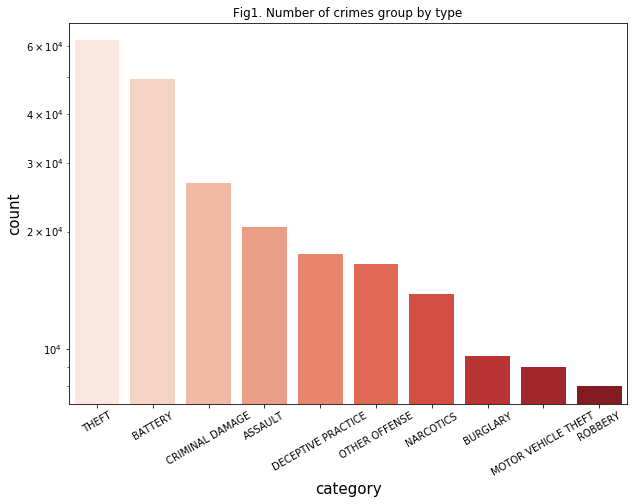

In [28]:
# Fig1. Number of crimes group by type
figure,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='PrimaryType',y='count',data=df_pt.head(10),palette = 'Reds',log = True)
ax.set_ylabel('count',fontsize = 15)
ax.set_xlabel('category',fontsize = 15)
plt.xticks(fontsize=10, rotation=30)
plt.title('Fig1. Number of crimes group by type')

In [29]:
df_ld = pd.DataFrame(df.groupby('LocationDescription').size().rename('count').sort_values(ascending = False).reset_index())
df_ld.head()

LocationDescription  count
0              STREET  56358
1           RESIDENCE  42226
2           APARTMENT  34285
3            SIDEWALK  20090
4               OTHER  10511

* Location Description

Text(0.5, 1.0, 'Fig2. Number of crimes group by location')

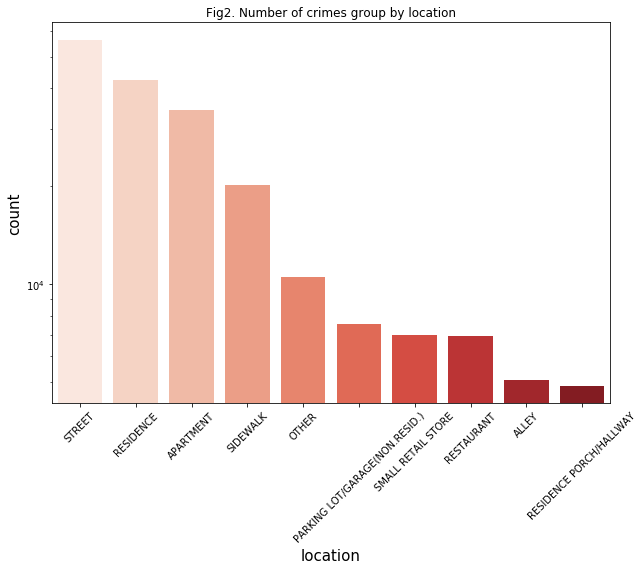

In [30]:
#Fig2. Number of crimes group by location
figure,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='LocationDescription',y='count',data=df_ld.head(10),palette = 'Reds',log = True)
ax.set_ylabel('count',fontsize = 15)
ax.set_xlabel('location',fontsize = 15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Fig2. Number of crimes group by location')

* Community

In [316]:
# Top 10 dangerous communities
df_ca_tmp = pd.DataFrame(df[df['CommunityArea']>0].groupby('CommunityArea').size().rename('count').sort_values(ascending = False).reset_index())
df_ca_tmp['CommunityArea'] = df_ca_tmp['CommunityArea'].astype('int')
df_ca = pd.merge(df_ca_tmp,df_ca_code,how = 'left',on = 'CommunityArea' )
df_ca.head(10)

CommunityArea  count             Name
0             25  14569           Austin
1              8  12457  Near North Side
2             32  10487             Loop
3             28   9222   Near West Side
4             29   8729   North Lawndale
5             43   8596      South Shore
6             23   7828    Humboldt Park
7             71   7511   Auburn Gresham
8             24   7212        West Town
9             44   6728          Chatham

Text(0.5, 1.0, 'Fig3.1 Top 10 dangerous comunity ')

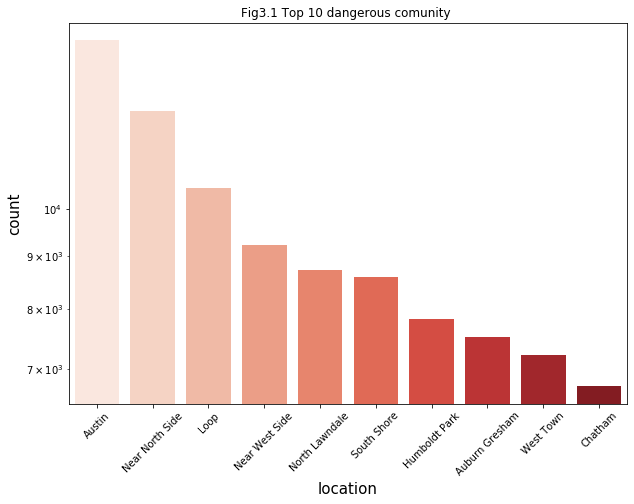

In [317]:
#Fig3.1 Top 10 dangerous comunity 
figure,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='Name',y='count',data=df_ca.head(10),palette = 'Reds',log = True)
ax.set_ylabel('count',fontsize = 15)
ax.set_xlabel('location',fontsize = 15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Fig3.1 Top 10 dangerous comunity ')

In [181]:
# Top 10 safest community
df_ca_tmp2 = pd.DataFrame(df[df['CommunityArea']>0].groupby('CommunityArea').size().rename('count').sort_values().reset_index())
df_ca_tmp2['CommunityArea'] = df_ca_tmp2['CommunityArea'].astype('int')
df_ca_r = pd.merge(df_ca_tmp2,df_ca_code,how = 'left',on = 'CommunityArea' )
df_ca_r.head(10)

CommunityArea  count             Name
0              9    257      Edison Park
1             47    369         Burnside
2             12    454      Forest Glen
3             74    461  Mount Greenwood
4             55    488        Hegewisch
5             18    539        Montclare
6             36    628          Oakland
7             13    787       North Park
8             57    795   Archer Heights
9             59    822    Mckinley Park

Text(0.5, 1.0, 'Fig3.2 Top 10 safe comunity ')

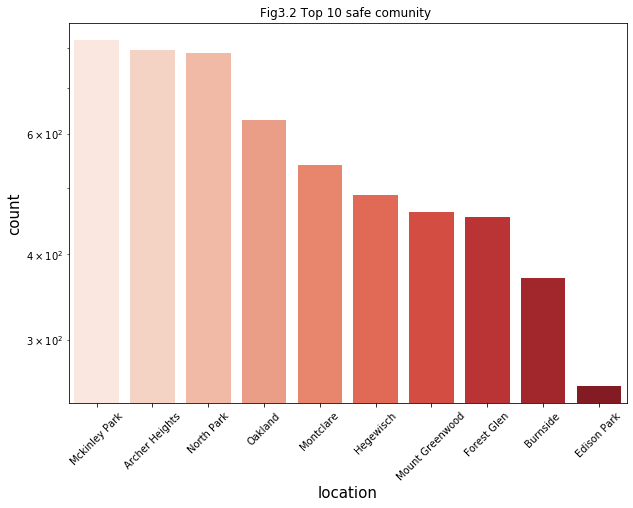

In [319]:
#Fig3.1 Top 10 safe comunity 
figure,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='Name',y='count',data=df_ca.tail(10),palette = 'Reds',log = True)
ax.set_ylabel('count',fontsize = 15)
ax.set_xlabel('location',fontsize = 15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Fig3.2 Top 10 safe comunity ')

* Block/street

In [0]:
tmp0 = df['Block'].apply(lambda x:' '.join(x.split()[1:]))
df['Street']=tmp0

In [184]:
df_st = pd.DataFrame(df.groupby('Street').size().rename('count').sort_values(ascending = False).reset_index())
df_st.head()

Street  count
0                 S MICHIGAN AVE   2945
1                     S STATE ST   2934
2  S DR MARTIN LUTHER KING JR DR   2546
3                   W MADISON ST   2493
4                   S HALSTED ST   2483

Text(0.5, 1.0, 'Fig4. Number of crimes group by street')

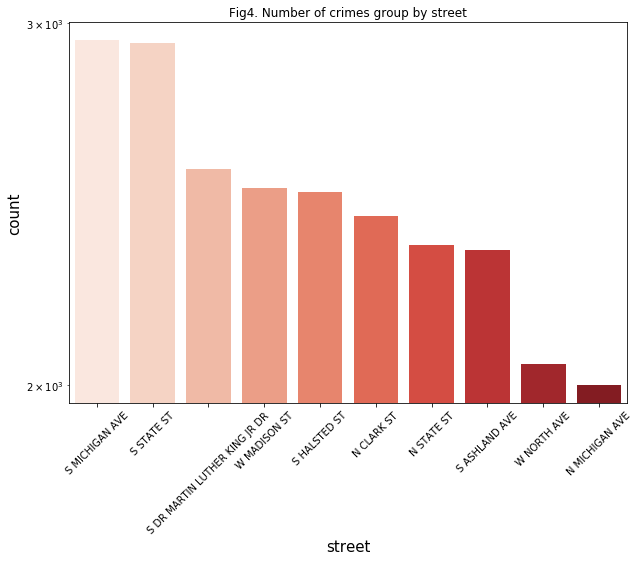

In [320]:
#Fig4. Number of crimes group by block
figure,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='Street',y='count',data=df_st.head(10),palette = 'Reds',log = True)
ax.set_ylabel('count',fontsize = 15)
ax.set_xlabel('street',fontsize = 15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Fig4. Number of crimes group by street')

* Date

In [186]:
tmp1 = pd.to_datetime(df.Date)
df['Date'] = tmp1
df['Month'] = tmp1.dt.month
df['Day'] = tmp1.dt.day
df['Hour'] = tmp1.dt.hour
df['Weekday'] = tmp1.dt.dayofweek
df.head()

ID CaseNumber                Date  ... Day Hour Weekday
0  11937375   JC566342 2019-12-31 00:23:00  ...  31    0       1
1  11937712   JC566735 2019-12-31 17:06:00  ...  31   17       1
2  11937620   JC566695 2019-12-31 14:00:00  ...  31   14       1
3  11937192   JC566077 2019-12-31 02:20:00  ...  31    2       1
4  11937298   JC566169 2019-12-31 06:10:00  ...  31    6       1

[5 rows x 27 columns]

In [187]:
# month
df_mon = pd.DataFrame(df.groupby('Month').size().rename('count').sort_values(ascending = False).reset_index())
df_mon.head()

Month  count
0      7  24627
1      8  24045
2      5  23474
3      6  23356
4      9  22105

In [188]:
# weekday
df_wd = pd.DataFrame(df.groupby('Weekday').size().rename('count').sort_values(ascending = False).reset_index())
df_wd.head()

Weekday  count
0        4  38524
1        5  37724
2        0  36638
3        1  36517
4        3  35967

In [189]:
# hour
df_hr = pd.DataFrame(df.groupby('Hour').size().rename('count').sort_values(ascending = False).reset_index())
df_hr.head()

Hour  count
0    12  15230
1    18  14804
2    19  14772
3    17  14375
4    15  14279

Text(0.5, 0.98, 'Fig5.1 Number of crimes group by date')

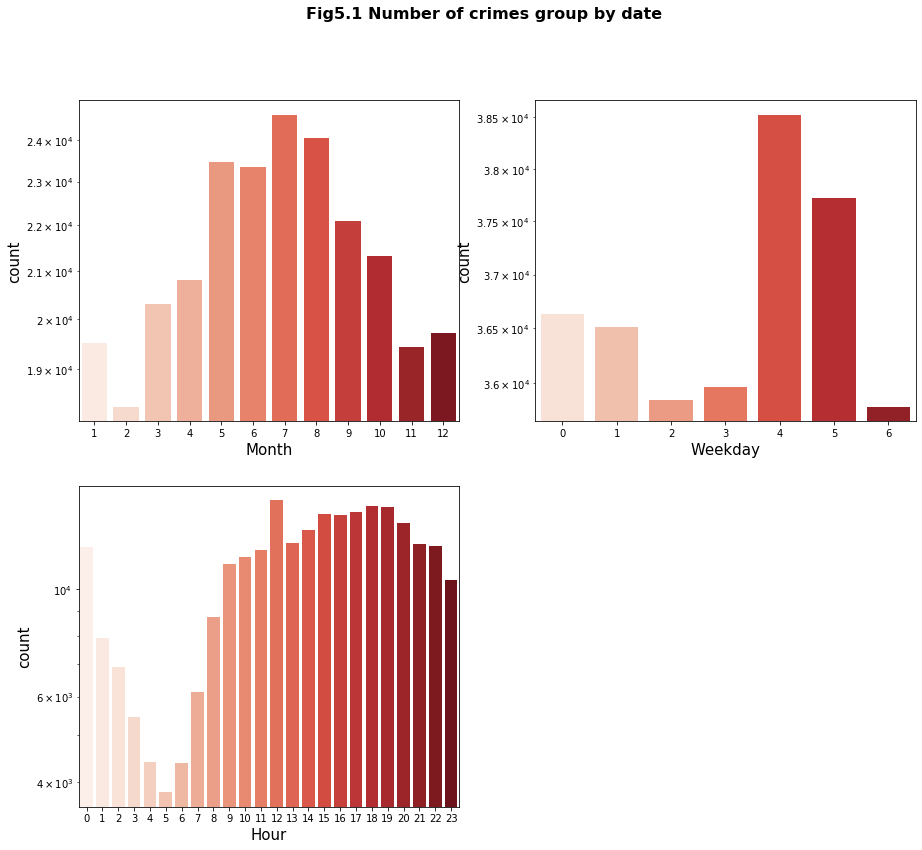

In [321]:
#Fig5. Number of crimes group by date
row = 2
col = 2
figure,ax = plt.subplots(row,col,figsize=(15,13))
df_to_plot = [df_mon,df_wd,df_hr]
titles = ['Month','Weekday','Hour']

for index,df_tmp in enumerate(df_to_plot):
  ax_tmp = ax[index//col,index%col]
  sns.barplot(x = df_tmp.columns[0],y = df_tmp.columns[1],data = df_tmp,palette = 'Reds',log = True,ax = ax_tmp)
  ax_tmp.set_xlabel(df_tmp.columns[0],fontsize = 15)
  ax_tmp.set_ylabel(df_tmp.columns[1],fontsize = 15)
  plt.xticks(fontsize=10, rotation=0)
  count = index+1

while count < row*col:
  ax[count//col,count%col].set_axis_off()
  count+=1
plt.suptitle('Fig5.1 Number of crimes group by date',fontsize = 16,fontweight='bold')



In [191]:
df_mont_wd = pd.DataFrame(df.groupby(['Month','Day']).size().rename('count').sort_values(ascending = False).reset_index())
df_mont_wd.head()

Month  Day  count
0      1    1    989
1      7   13    888
2      7    5    884
3      6    1    877
4      6    8    876

Text(0.5, 0.98, 'Fig5.2 Number of crimes by date')

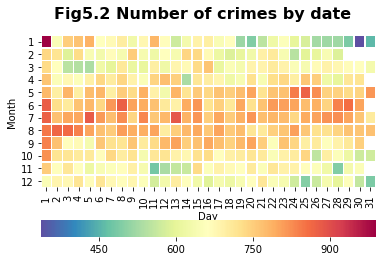

In [322]:
df_mont_wd_pv = df_mont_wd.pivot("Month", "Day", "count")
ax = sns.heatmap(df_mont_wd_pv,linewidths=.5,cmap="Spectral_r",cbar_kws={"orientation": "horizontal"})
plt.suptitle('Fig5.2 Number of crimes by date',fontsize = 16,fontweight='bold')

* Winter

Most crimes(over 900) happend on the New Year's day, then it start to decrease, reaching the lowest at end of the January. I guess one of the possisble reasons of is that many people come back from holiday on New Year's Day, involing travel, traffic,etc. On the other hand, there are many celebration events going on that day, which brings a lot of activies for possible crimes.

From February,to April, crimes on average are around 600, which is low comparing to other months.

* Spring to summer

Starting from May, we can see an increase in the total crime number, especially approaching the end. And it stays high until the mid September.

Possibly, as the weather becomes warmer,more crimes happend. Noticeably, February crime is the lowest in 2019. Normally, this is the coldest month in Chicago with large amount of snow, which I guess brings incovenience to crimes.

* Fall to winter

In the winter (October to December), the crime stays relatively low. Not surprisingly, Christmas Day turns out to be the lowest since most people are staying home and there are few people on the street.

In [193]:
df_wd_hr = pd.DataFrame(df.groupby(['Weekday','Hour']).size().rename('count').sort_values(ascending = False).reset_index())
df_wd_hr.head()

Weekday  Hour  count
0        0    12   2351
1        4    12   2345
2        1    12   2293
3        2    12   2254
4        4    19   2246

Text(0.5, 0.98, 'Fig5.3 Number of crimes by Hour')

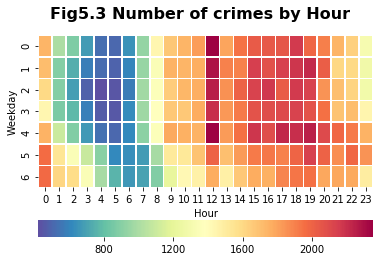

In [323]:
df_wd_hr_pv = df_wd_hr.pivot("Weekday", "Hour", "count")
ax = sns.heatmap(df_wd_hr_pv,linewidths=.5,cmap="Spectral_r",cbar_kws={"orientation": "horizontal"})
plt.suptitle('Fig5.3 Number of crimes by Hour',fontsize = 16,fontweight='bold')

The peak is around the noon and evening (3-7 pm). 
It would help to distribute more police at these timeslots

In [195]:
top_10_st = df_st.head(20)['Street'].tolist()
df_wd_st = pd.DataFrame(df[df['Street'].isin(top_10_st)].groupby(['Street','Weekday']).size().rename('count')).reset_index()
df_wd_st.head()

Street  Weekday  count
0  N CLARK ST        0    277
1  N CLARK ST        1    312
2  N CLARK ST        2    331
3  N CLARK ST        3    289
4  N CLARK ST        4    367

Text(0.5, 0.98, 'Fig5.4 Number of crimes by street')

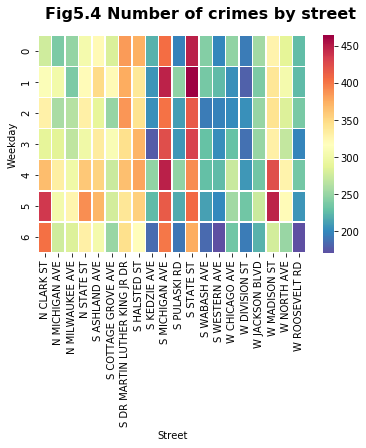

In [324]:
df_wd_st_pv = df_wd_st.pivot("Weekday", "Street", "count")
ax = sns.heatmap(df_wd_st_pv,linewidths=.5,cmap="Spectral_r")
plt.suptitle('Fig5.4 Number of crimes by street',fontsize = 16,fontweight='bold')

* Resolution/arrest

In [0]:
#df['Arrest'] = df['Arrest'].astype(int)
#df.head(5)

In [199]:
df_arr = df.groupby(['PrimaryType','Arrest']).size().rename('count').reset_index()
df_arr.head()

PrimaryType  Arrest  count
0       ARSON   False    343
1       ARSON    True     29
2     ASSAULT   False  16859
3     ASSAULT    True   3707
4     BATTERY   False  39174

Text(0.5, 1.0, 'Fig6. Resolution group by crimes')

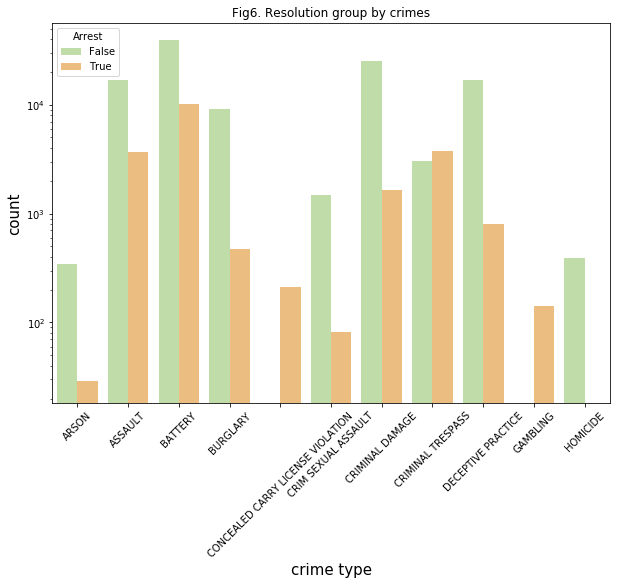

In [325]:
figure,ax = plt.subplots(figsize=(10,7))
sns.barplot(x = 'PrimaryType',y='count',hue ='Arrest', data = df_arr.head(20),palette = 'Spectral_r',log = True)
ax.set_ylabel('count',fontsize = 15)
ax.set_xlabel('crime type',fontsize = 15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Fig6. Resolution group by crimes')

## 3.3 Geowise Visualization

In [201]:
df.describe()

ID           Beat  ...           Hour        Weekday
count  2.570020e+05  257002.000000  ...  257002.000000  257002.000000
mean   1.172600e+07    1136.884195  ...      13.111131       3.009868
std    5.258066e+05     696.612343  ...       6.548004       1.995248
min    2.436800e+04     111.000000  ...       0.000000       0.000000
25%    1.165313e+07     611.000000  ...       9.000000       1.000000
50%    1.174934e+07    1024.000000  ...      14.000000       3.000000
75%    1.184400e+07    1722.000000  ...      18.000000       5.000000
max    1.194422e+07    2535.000000  ...      23.000000       6.000000

[8 rows x 14 columns]

* Crimes display on map

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


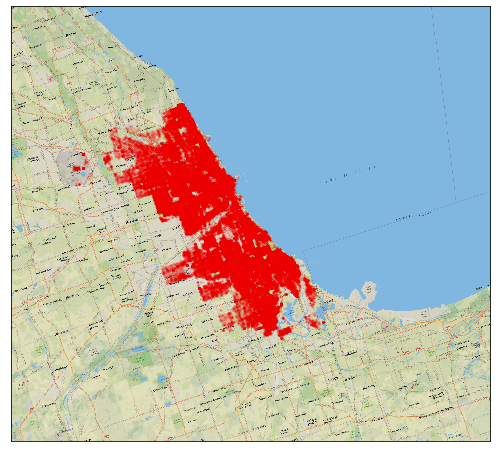

In [202]:
bm = Basemap(projection='mill',llcrnrlat=df.Latitude.min()+5,urcrnrlat=df.Latitude.max(),
            llcrnrlon=df.Longitude.min()+3.5,urcrnrlon=df.Longitude.max()+0.5,resolution="i",epsg=2770)
x,y= bm(list(df.Longitude[(df.Longitude.isnull()==False)]),list(df.Latitude[(df.Latitude.isnull()==False)]))
plt.figure(figsize=(10,8))
bm.arcgisimage(service="NatGeo_World_Map",xpixels=1500,verbose=True)
bm.scatter(x,y,c = 'r',marker ='o',s=2,alpha=0.05)

* Crimes heatmap

In [203]:
from folium.plugins import HeatMap
map_heat= folium.Map(location=[41.843489, -87.669451],zoom_start = 10, control_scale=True) 
df_data=df.dropna(axis = 0, subset = ['Latitude'] )
heat_data = [[row['Latitude'],row['Longitude']] for index, row in df_data[:20000].iterrows()]
HeatMap(heat_data,radius=12).add_to(map_heat)
map_heat

It seems that chicago downtown and south areas are the most dangerous part.

## 3.4 K means Clustering

* Preparing data

In [204]:
# Define areas of interest
x = 5
la_min = df['Latitude'].mean() - x*df['Latitude'].std()
la_max = df['Latitude'].mean() + x*df['Latitude'].std()
lo_min = df['Longitude'].mean() - x*df['Longitude'].std()
lo_max = df['Longitude'].mean() + x*df['Longitude'].std()
data = df[(df['Latitude']<= la_max)&(df['Latitude']>= la_min)&(df['Longitude']<= lo_max)&(df['Longitude']>= lo_min)]
data = data[['Latitude','Longitude']]
data = data.dropna(axis = 0, subset = ['Latitude'] )
data.head()

Latitude  Longitude
0  41.977881 -87.752683
1  41.950533 -87.676847
2  41.936799 -87.644292
3  41.900994 -87.707707
4  41.706597 -87.616187

* Define functions

In [0]:
# Function1: do k means clustering
def kmeans_cluster(data, n):
  '''
  data : input dataframe
  n : cluster_number
  '''
  model = KMeans(n)
  model.fit(data)
  cluster_label = model.predict(data)
  centeroid = model.cluster_centers_
  return cluster_label, centeroid

In [0]:
# Function2: extract k means clustering result 
def x_clusters(n,data):
  cluster_label_x, centeroid_x = kmeans_cluster(data,n)
  kmeans = pd.DataFrame(cluster_label_x)
  center = pd.DataFrame(centeroid_x)
  center.columns = ['Latitude','Longitude']
  datax = data.assign(label=kmeans)
  return kmeans,center,datax

In [0]:
# Function3: plot clustering result
LABEL_COLOR_MAP = {0 : 'salmon', 1 : 'grey',2 : 'sandybrown',3 : 'yellow', 4 : 'yellowgreen',5: 'cyan',6: 'blueviolet',7:'pink',8:'orange',9:'olive',10:'navy'}
def plot_cluster(kmeans,data,center):
  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111)
  labels=kmeans[0]
  label_color = [LABEL_COLOR_MAP[l] for l in labels]
  ax.set_title('K-Means Clustering')
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  plt.scatter(data['Longitude'],data['Latitude'], c=label_color)
  plt.scatter(center['Longitude'],center['Latitude'], c = 'blue',marker='x',s = 150)

In [0]:
# Function4: plot clustering result on real maps
LABEL_COLOR_MAP = {0 : 'salmon', 1 : 'grey',2 : 'sandybrown',3 : 'yellow', 4 : 'yellowgreen',5: 'cyan',6: 'blueviolet',7:'pink',8:'orange',9:'olive',10:'navy'}
def plot_clustermap(kmeans,data,center):
  bm = Basemap(projection='mill',llcrnrlat=df.Latitude.min()+5,urcrnrlat=df.Latitude.max(),
              llcrnrlon=df.Longitude.min()+3.5,urcrnrlon=df.Longitude.max()+0.5,resolution="i",epsg=2770)
  x,y= bm(list(data.Longitude),list(data.Latitude))
  cx,cy = bm(list(center.Longitude),list(center.Latitude))
  plt.figure(figsize=(10,8))
  labels=kmeans[0]
  label_color = [LABEL_COLOR_MAP[l] for l in labels]
  bm.arcgisimage(service="NatGeo_World_Map",xpixels=1500,verbose=True)
  bm.scatter(x,y,c=label_color,marker='o',s=2,alpha=0.01)
  bm.scatter(cx,cy,c ='blue',marker='x',s=50,alpha=1)

* 2 clusters

In [0]:
kmeans2,center2,data2 = x_clusters(2,data)

In [331]:
data2.head(5)

Latitude  Longitude  label
0  41.977881 -87.752683    0.0
1  41.950533 -87.676847    0.0
2  41.936799 -87.644292    0.0
3  41.900994 -87.707707    0.0
4  41.706597 -87.616187    1.0

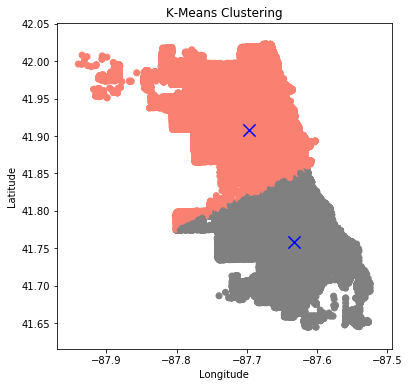

In [332]:
plot_cluster(kmeans2,data2,center2)

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


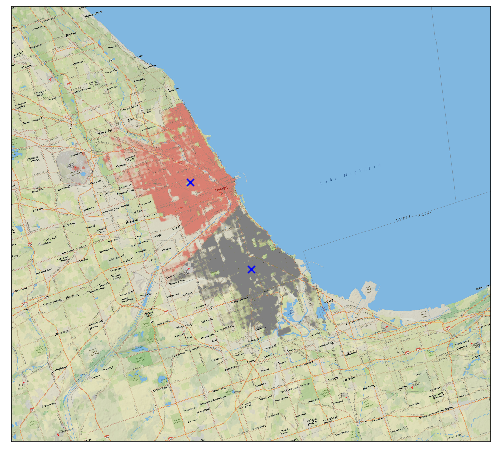

In [333]:
plot_clustermap(kmeans2,data2,center2)

* 5 clusters

In [0]:
kmeans5,center5,data5 = x_clusters(5,data)

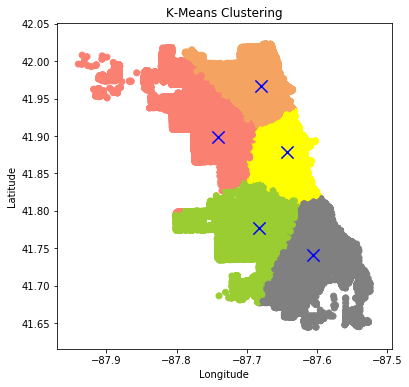

In [335]:
plot_cluster(kmeans5,data5,center5)

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


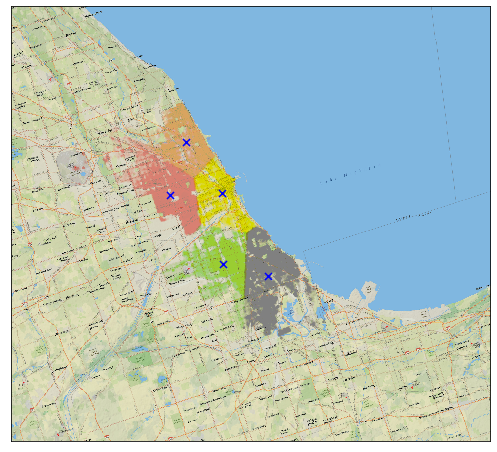

In [336]:
plot_clustermap(kmeans5,data5,center5)

* 10 clusters

In [0]:
kmeans10,center10,data10, = x_clusters(10,data)

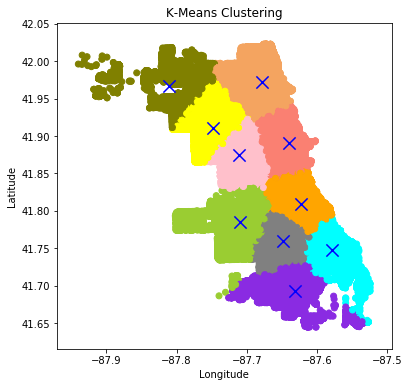

In [338]:
plot_cluster(kmeans10,data10,center10)

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


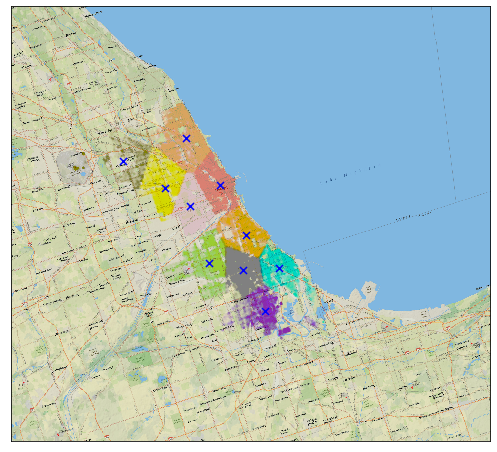

In [339]:
plot_clustermap(kmeans10,data10,center10)

## 3.6 Analysis on police station data

* Prepocess data

In [216]:
df_ps.head()

DISTRICT   DISTRICT NAME  ...  LONGITUDE                         LOCATION
0             1         Central  ... -87.627356   (41.8583725929, -87.627356171)
1             6         Gresham  ... -87.644229  (41.7521368378, -87.6442289066)
2            11        Harrison  ... -87.705488   (41.8735822883, -87.705488126)
3            16  Jefferson Park  ... -87.766149  (41.9740944511, -87.7661488432)
4  Headquarters    Headquarters  ... -87.623395  (41.8307016873, -87.6233953459)

[5 rows x 15 columns]

In [217]:
df_ps.shape

(23, 15)

In [218]:
df_ps.columns

Index(['DISTRICT', 'DISTRICT NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'WEBSITE', 'PHONE', 'FAX', 'TTY', 'X COORDINATE', 'Y COORDINATE',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [0]:
# rename the columns
def rename_ps(x):
  lis = x.split()
  lis2 = []
  for _ in lis:
    lis2.append(_.lower().capitalize())
  return ''.join(lis2)

df_ps = df_ps.rename(columns=lambda x: rename_ps(x))

In [220]:
df_ps.columns

Index(['District', 'DistrictName', 'Address', 'City', 'State', 'Zip',
       'Website', 'Phone', 'Fax', 'Tty', 'XCoordinate', 'YCoordinate',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

* Define functions

In [0]:
# Function5: Compare police station location and cluster center
LABEL_COLOR_MAP = {0 : 'salmon', 1 : 'grey',2 : 'sandybrown',3 : 'yellow', 4 : 'yellowgreen',5: 'cyan',6: 'blueviolet',7:'pink',8:'orange',9:'olive',10:'navy'
,11:'black',12:'gold',13:'blue',14:'rosybrown',15:'lime',16:'silver',17:'steelblue',18:'green',19:'plum',20:'lightsteelblue',21:'darkseagreen',22:'indigo'}
def plot_ps(kmeans,data,center,df_ps):
  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111)
  labels=kmeans[0]
  label_color = [LABEL_COLOR_MAP[l] for l in labels]
  ax.set_title('K-Means Clustering')
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  plt.scatter(data['Longitude'],data['Latitude'], c=label_color)
  plt.scatter(center['Longitude'],center['Latitude'], c = 'blue',marker='x',label = 'Cluster center',s = 150)
  plt.scatter(df_ps['Longitude'],df_ps['Latitude'], c = 'red',marker='o',label = 'Police station',s = 150)
  plt.legend()

In [0]:
# Function5: Compare police station location and cluster center on real map
LABEL_COLOR_MAP = {0 : 'salmon', 1 : 'grey',2 : 'sandybrown',3 : 'yellow', 4 : 'yellowgreen',5: 'cyan',6: 'blueviolet',7:'pink',8:'orange',9:'olive',10:'navy'
,11:'black',12:'gold',13:'blue',14:'rosybrown',15:'lime',16:'silver',17:'steelblue',18:'green',19:'plum',20:'lightsteelblue',21:'darkseagreen',22:'indigo'}

def plot_ps_map(kmeans,data,center,df_ps):
  bm = Basemap(projection='mill',llcrnrlat=df.Latitude.min()+5,urcrnrlat=df.Latitude.max(),
              llcrnrlon=df.Longitude.min()+3.5,urcrnrlon=df.Longitude.max()+0.5,resolution="i",epsg=2770)
  x,y= bm(list(data.Longitude),list(data.Latitude))
  cx,cy = bm(list(center.Longitude),list(center.Latitude))
  x_ps,y_ps= bm(list(df_ps.Longitude[(df_ps.Longitude.isnull()==False)]),list(df_ps.Latitude[(df_ps.Latitude.isnull()==False)]))
  plt.figure(figsize=(10,8))
  labels=kmeans[0]
  label_color = [LABEL_COLOR_MAP[l] for l in labels]
  bm.arcgisimage(service="NatGeo_World_Map",xpixels=1500,verbose=True)
  bm.scatter(x,y,c=label_color,marker='o',s=2,alpha=0.01)
  bm.scatter(cx,cy,c ='blue',marker='x',s=50,alpha=1)
  bm.scatter(x_ps,y_ps,c = 'red',marker ='o',s=50,alpha=1)

* 10 clusters

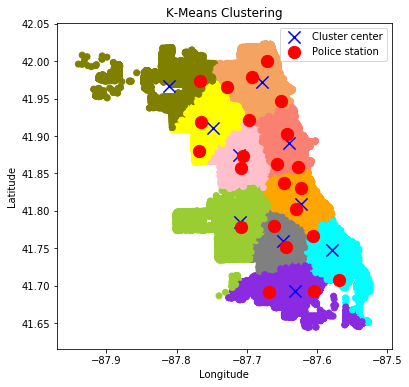

In [346]:
plot_ps(kmeans10,data10,center10,df_ps)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


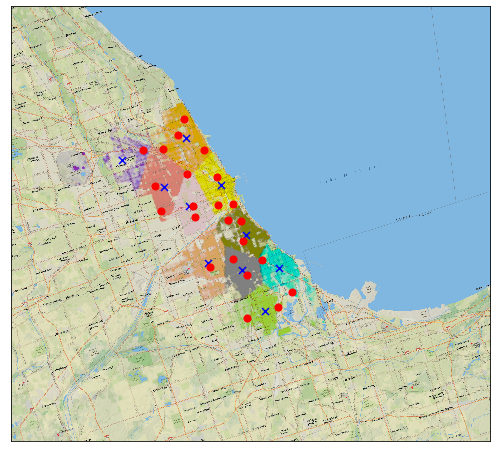

In [224]:
plot_ps_map(kmeans10,data10,center10,df_ps)

* 23 clusters

In [0]:
kmeans23,center23,data23, = x_clusters(23,data)

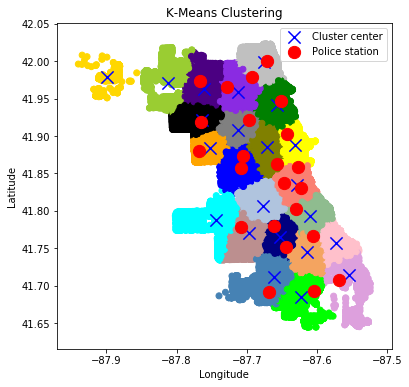

In [347]:
plot_ps(kmeans23,data23,center23,df_ps)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


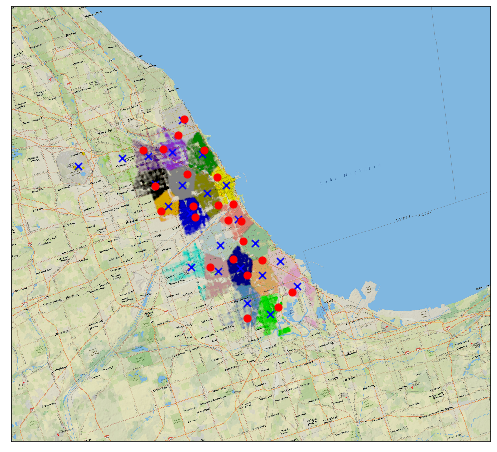

In [227]:
plot_ps_map(kmeans23,data23,center23,df_ps)

* Analysis

Finding #1

Below is the Chicago community map.

Comparing the community map with the current distributed police station, it looks like there are none in community 76,community 9&10&17 and  community 56&64. 

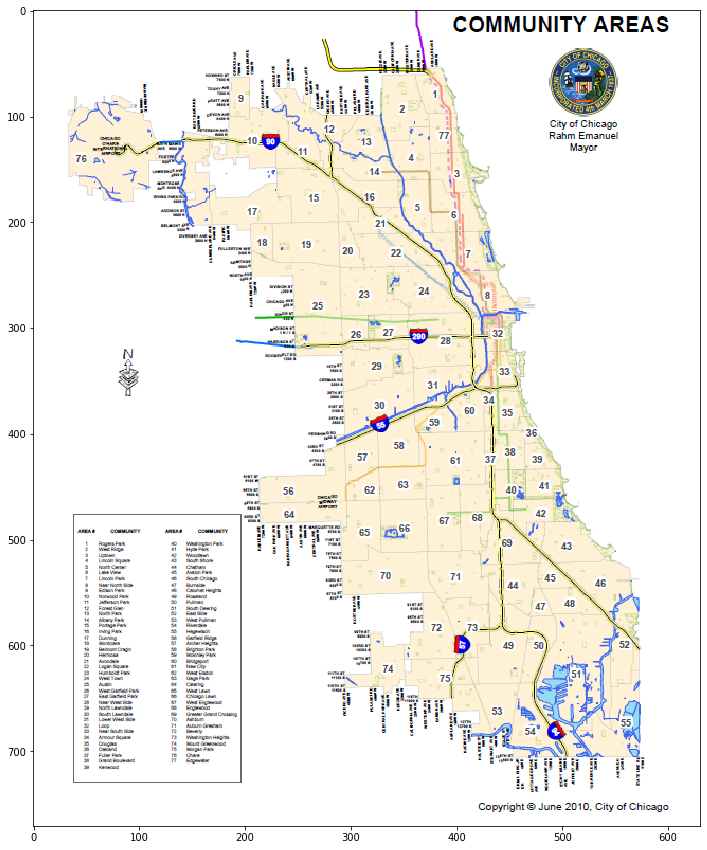

In [294]:
fig,ax = plt.subplots(1,1,figsize = (15,15))
img = mpimg.imread('chi_community.png')
ax.imshow(img) 
plt.show() 

In [307]:
print('Average number of crimes in different areas:',df_ca['count'].mean())
print('Lowest number of crimes in different areas:',df_ca['count'].min())

Average number of crimes in different areas: 3337.6103896103896
Lowest number of crimes in different areas: 257


In [308]:
# Look at the safest 10 communities
df_ca.tail(10)

CommunityArea  count             Name
67             59    822    Mckinley Park
68             57    795   Archer Heights
69             13    787       North Park
70             36    628          Oakland
71             18    539        Montclare
72             55    488        Hegewisch
73             74    461  Mount Greenwood
74             12    454      Forest Glen
75             47    369         Burnside
76              9    257      Edison Park

In [303]:
# Look at the communities with none police stations
df_ca[df_ca['CommunityArea'].isin([9,10,17,56,64,76])]

CommunityArea  count            Name
45             56   1822  Garfield Ridge
49             76   1576           Ohare
54             17   1314         Dunning
59             10   1137    Norwood Park
63             64    916        Clearing
76              9    257     Edison Park

* Finding #2

Comparing with the safest 10 areas in chicago, the crime numbers in the above areas where currently no police station was built is relatively high. It is suggested to distribute more police in these communities. What's better is to built some police stations in these areas.

The suggested 3 policed station locations have been studied with K means clustering.They are the center of the top left yellow, green blocks ,and the middle left blue block shown below.

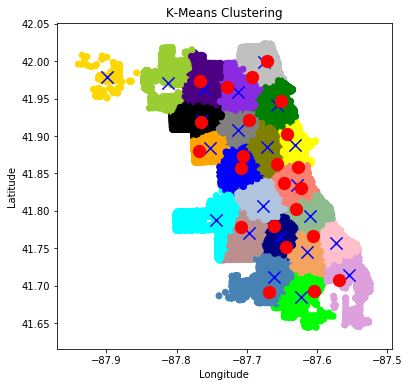

In [309]:
plot_ps(kmeans23,data23,center23,df_ps)